In [89]:
import numpy as np
from numpy import *

# Forward Kinematics


### Robot Link Angles & Lengths
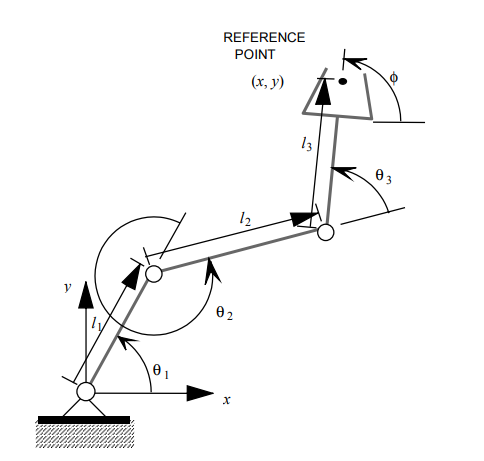

In [366]:
l1=5 #Lenth of Link 1
l2=3 #Length of Link 2
l3=4 #Length of Link 3
t_1=54 #theta1
t_2=30 #theta2
t_3=25 #theta3


In [367]:
#Degrees to Radians Conversion
t1=deg2rad(t_1)
t2=deg2rad(t_2)
t3=deg2rad(t_3)

In [368]:
#Rotation Matrices
R0_1=[[np.cos(t1),-np.sin(t1),0],[np.sin(t1),np.cos(t1),0],[0,0,1]]

R1_2=[[np.cos(t2),-np.sin(t2),0],[np.sin(t2),np.cos(t2),0],[0,0,1]]

R2_3=[[np.cos(t2),-np.sin(t2),0],[np.sin(t2),np.cos(t2),0],[0,0,1]]

In [369]:
#Displacement Vectors
d0_1=[[l1*cos(t1)],[l1*sin(t1)],[0]]

d1_2=[[l2*cos(t2)],[l2*sin(t2)],[0]]

d2_3=[[l3*cos(t3)],[l3*sin(t3)],[0]]

In [370]:
H0_1=np.concatenate((R0_1,d0_1),1)
H0_1=np.concatenate((H0_1,[[0,0,0,1]]),0)
print("H0_1",np.matrix(H0_1))

H1_2=np.concatenate((R1_2,d1_2),1)
H1_2=np.concatenate((H1_2,[[0,0,0,1]]),0)
print("H1_2",np.matrix(H1_2))

H2_3=np.concatenate((R2_3,d2_3),1)
H2_3=np.concatenate((H2_3,[[0,0,0,1]]),0)
print("H2_3",np.matrix(H2_3))

H0_3=np.dot(np.dot(H0_1,H1_2),H2_3)

print("H0_3",np.matrix(H0_3))

H0_1 [[ 0.58778525 -0.80901699  0.          2.93892626]
 [ 0.80901699  0.58778525  0.          4.04508497]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
H1_2 [[ 0.8660254  -0.5         0.          2.59807621]
 [ 0.5         0.8660254   0.          1.5       ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
H2_3 [[ 0.8660254  -0.5         0.          3.62523115]
 [ 0.5         0.8660254   0.          1.69047305]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
H0_3 [[-0.40673664 -0.91354546  0.          1.95023903]
 [ 0.91354546 -0.40673664  0.         10.81072496]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [371]:
print("X=" + str(H0_3[0][3]),"\nY="+str(H0_3[1][3]))


X=1.9502390334366997 
Y=10.810724960376826


# Inverse Kinematics

## Given (x,y) of end effector, We will find out the individual angles between each link

In [391]:
x=1.950
y=10.810
phi=109
phi=deg2rad(phi)
x3=l3*cos(phi)
y3=l3*sin(phi)
x2=x-x3 
y2=y-y3

In [392]:
r1=np.sqrt(x2**2+y2**2)
phi_3=np.arctan(y2/x2)
phi_3=rad2deg(phi_3)
phi_1=np.arccos((-l2**2+l1**2+r1**2)/(2*l1*r1))
phi_1=rad2deg(phi_1)
t_1=phi_3-phi_1


In [393]:
phi_2=np.arccos((-r1**2+l1**2+l2**2)/(2*l1*l2))
phi_2=rad2deg(phi_2)
t_2=phi_2-180


In [394]:
if t_1<0:
    t_1=t_1*(-1)
elif t_2<0:
    t_2=t_2*(-1)
t_3=rad2deg(phi)-t_1-t_2
print("Theta1 ="+str(round(t_1,2)),"\nTheta2 ="+str(round(t_2,2)),"\nTheta3 ="+str(round(t_3,2)))

Theta1 =53.98 
Theta2 =30.04 
Theta3 =24.97
